In [1]:
#import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Shark Tank India.csv")##read/import csv file 
data

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1,35,The Final Destination,117,Elcare India,Medical,Carenting for Elders,https://elcare.co/,3,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,1,36,Gateway To Shark Tank India,118,SneaKare,Beauty/Fashion,Shoe Sneaker kits storage crates,https://sneakare.com/,1,1.0,...,7.0,4.00,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0
118,1,36,Gateway To Shark Tank India,119,French Crown,Beauty/Fashion,Clothes,https://frenchcrown.in/,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,1,36,Gateway To Shark Tank India,120,Store My Goods,Services,Storage solutions,https://storemygoods.in/,3,2.0,...,0.0,0.00,NaN,25.0,2.0,25.0,NaN,NaN,NaN,2.0


In [3]:
print("Dataset have {} rows and {} columns.".format(data.shape[0],data.shape[1]))##size of dataset

Dataset have 121 rows and 50 columns.


In [3]:
data=data.set_index('Pitch Number')##set new index

In [4]:
data

,Season Number,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Pitch Number,,,,,,,,,,,,,,,,,,,,,
1,1,1,Badlegi Business Ki Tasveer,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,1.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,1,1,Badlegi Business Ki Tasveer,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,1,Badlegi Business Ki Tasveer,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,2,"Insaan, Ideas Aur Sapne",Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,1,2,"Insaan, Ideas Aur Sapne",Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1,35,The Final Destination,Elcare India,Medical,Carenting for Elders,https://elcare.co/,3,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,1,36,Gateway To Shark Tank India,SneaKare,Beauty/Fashion,Shoe Sneaker kits storage crates,https://sneakare.com/,1,1.0,NaN,...,7.0,4.00,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0
119,1,36,Gateway To Shark Tank India,French Crown,Beauty/Fashion,Clothes,https://frenchcrown.in/,2,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns##columns name

Index(['Season Number', 'Episode Number', 'Episode Title', 'Startup Name',
       'Industry', 'Business Description', 'Company Website',
       'Number of Presenters', 'Male Presenters', 'Female Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Original Ask Amount', 'Original Ask Equity',
       'Valuation Requested', 'Received Offer', 'Accepted Offer',
       'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt',
       'Valuation Offered', 'Ashneer Investment Amount',
       'Ashneer Investment Equity', 'Ashneer Debt Amount',
       'Namita Investment Amount', 'Namita Investment Equity',
       'Namita Debt Amount', 'Anupam Investment Amount',
       'Anupam Investment Equity', 'Anupam Debt Amount',
       'Vineeta Investment Amount', 'Vineeta Investment Equity',
       'Vineeta Debt Amount', 'Aman Investment Amount',
       'Aman Investment Equity',

In [6]:
data.head()

,Season Number,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Pitch Number,,,,,,,,,,,,,,,,,,,,,
1,1,1,Badlegi Business Ki Tasveer,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,1.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,1,1,Badlegi Business Ki Tasveer,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,1,Badlegi Business Ki Tasveer,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,2,"Insaan, Ideas Aur Sapne",Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,1,2,"Insaan, Ideas Aur Sapne",Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.tail()

,Season Number,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Pitch Number,,,,,,,,,,,,,,,,,,,,,
117,1,35,The Final Destination,Elcare India,Medical,Carenting for Elders,https://elcare.co/,3,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,1,36,Gateway To Shark Tank India,SneaKare,Beauty/Fashion,Shoe Sneaker kits storage crates,https://sneakare.com/,1,1.0,NaN,...,7.0,4.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3.0
119,1,36,Gateway To Shark Tank India,French Crown,Beauty/Fashion,Clothes,https://frenchcrown.in/,2,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,1,36,Gateway To Shark Tank India,Store My Goods,Services,Storage solutions,https://storemygoods.in/,3,2.0,1.0,...,0.0,0.0,NaN,25.0,2.0,25.0,NaN,NaN,NaN,2.0
121,1,36,Gateway To Shark Tank India,Devnagri,Technology,Translation of language content,https://devnagri.com/,2,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 1 to 121
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              121 non-null    int64  
 1   Episode Number             121 non-null    int64  
 2   Episode Title              121 non-null    object 
 3   Startup Name               121 non-null    object 
 4   Industry                   121 non-null    object 
 5   Business Description       121 non-null    object 
 6   Company Website            112 non-null    object 
 7   Number of Presenters       121 non-null    int64  
 8   Male Presenters            102 non-null    float64
 9   Female Presenters          62 non-null     float64
 10  Couple Presenters          120 non-null    float64
 11  Pitchers Average Age       121 non-null    object 
 12  Started in                 95 non-null     float64
 13  Pitchers City              114 non-null    object 

In [9]:
data.isna().sum()##checking null/empty value

Season Number                  0
Episode Number                 0
Episode Title                  0
Startup Name                   0
Industry                       0
Business Description           0
Company Website                9
Number of Presenters           0
Male Presenters               19
Female Presenters             59
Couple Presenters              1
Pitchers Average Age           0
Started in                    26
Pitchers City                  7
Pitchers State                 5
Yearly Revenue                69
Monthly Sales                 56
Gross Margin                  86
Original Ask Amount            0
Original Ask Equity            0
Valuation Requested            0
Received Offer                 0
Accepted Offer                33
Total Deal Amount             54
Total Deal Equity             54
Total Deal Debt              112
Valuation Offered             54
Ashneer Investment Amount     67
Ashneer Investment Equity     67
Ashneer Debt Amount          119
Namita Inv

In [10]:
data=data.fillna(0)##fill null/empty cell with 0

In [11]:
data

,Season Number,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Pitch Number,,,,,,,,,,,,,,,,,,,,,
1,1,1,Badlegi Business Ki Tasveer,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,1.0,...,25.0,5.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,1,1,Badlegi Business Ki Tasveer,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1,1,Badlegi Business Ki Tasveer,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,0.0,1.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,1,2,"Insaan, Ideas Aur Sapne",Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1,2,"Insaan, Ideas Aur Sapne",Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,3.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1,35,The Final Destination,Elcare India,Medical,Carenting for Elders,https://elcare.co/,3,2.0,1.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,1,36,Gateway To Shark Tank India,SneaKare,Beauty/Fashion,Shoe Sneaker kits storage crates,https://sneakare.com/,1,1.0,0.0,...,7.0,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
119,1,36,Gateway To Shark Tank India,French Crown,Beauty/Fashion,Clothes,https://frenchcrown.in/,2,2.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Wordcloud

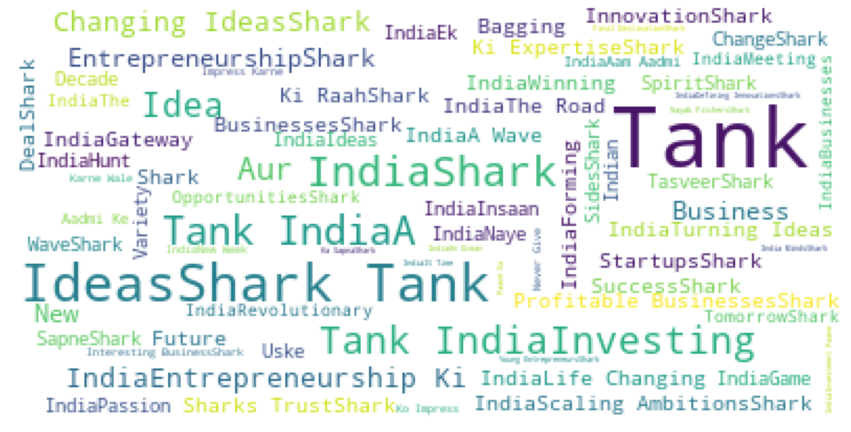

In [12]:
text='Shark Tank India'.join(data["Episode Title"])
stop_word=STOPWORDS
wordcloud=WordCloud(background_color='white', max_words=100, max_font_size=40,stopwords=stop_word).generate(text)
plt.figure(figsize=(15,8),facecolor=None)
plt.axis('off')
plt.imshow(wordcloud)

#### Dataset Information

In [13]:
dataset_info=pd.DataFrame({"Total Episode":[data['Episode Number'].max()],
                          'Total Startup pitched':[data['Startup Name'].count()],
                   'Total Investment':[int(data['Total Deal Amount'].sum())],
                   'Total Equity':[int(data['Total Deal Equity'].sum())],
                   'Number of Deals':[data['Accepted Offer'].value_counts()[1]]
                  },index=["Count"])

In [14]:
dataset_info

,Total Episode,Total Startup pitched,Total Investment,Total Equity,Number of Deals
Count,36,121,3903,1064,67


### Analysis

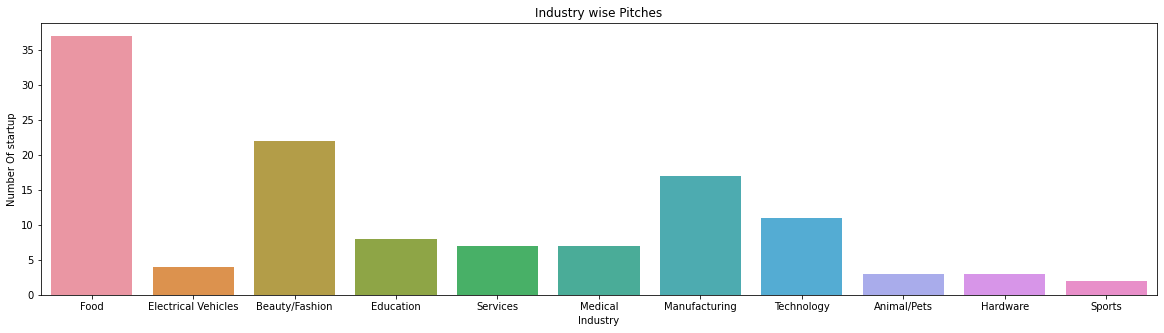

In [15]:
plt.figure(figsize=(20,5))
plt.title('Industry wise Pitches')
sns.countplot(data["Industry"])
plt.ylabel("Number Of startup")
plt.show()

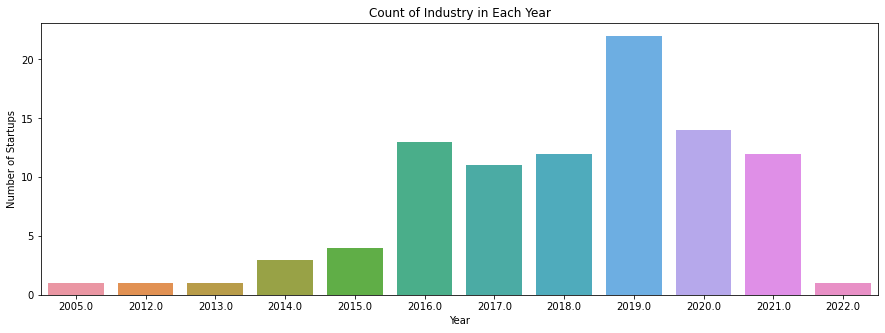

In [16]:
plt.figure(figsize=(15,5))
plt.title('Count of Industry in Each Year')
sns.countplot(data[data['Started in']!=0]['Started in'])
plt.ylabel('Number of Startups')
plt.xlabel('Year')
plt.show()

<Figure size 1080x360 with 0 Axes>

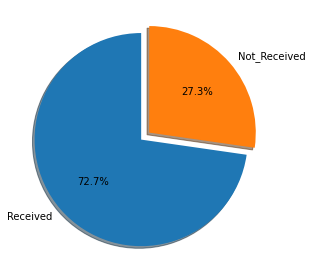

In [17]:
data1=[data['Received Offer'].sum().astype(int),(data.shape[0]-data['Received Offer'].sum()).astype(int)]
labels=['Received','Not_Received']
color=["Green",'Red']
plt.figure(figsize=(15,5))
fig1, ax1 = plt.subplots()
explode = (0, 0.1)
ax1.pie(data1,labels=labels,explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.tight_layout()
plt.show()

<Figure size 1080x360 with 0 Axes>

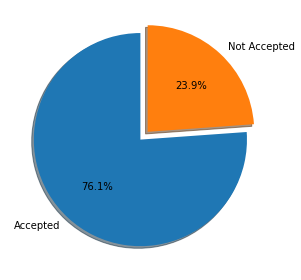

In [18]:
data2 = [data['Accepted Offer'].sum(), data['Received Offer'].sum()-data['Accepted Offer'].sum()]
labels = ['Accepted', 'Not Accepted']
colors=['Green','Red']
plt.figure(figsize=(15,5))
fig1, ax1 = plt.subplots()
explode = (0, 0.1)
ax1.pie(data2,labels=labels,explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.tight_layout()
plt.show()

In [19]:
Presenters=pd.DataFrame({"Male":[data['Male Presenters'].sum().astype(int)],
                          "Female":[data['Female Presenters'].sum().astype(int)]},index=["Total_presenters"])

In [20]:
Presenters

,Male,Female
Total_presenters,177,75


In [21]:
data['Number of Presenters'].unique()

array([3, 1, 2, 4, 6], dtype=int64)

In [22]:
data['Number of Presenters'].value_counts()

2    56
1    33
3    23
4     8
6     1
Name: Number of Presenters, dtype: int64

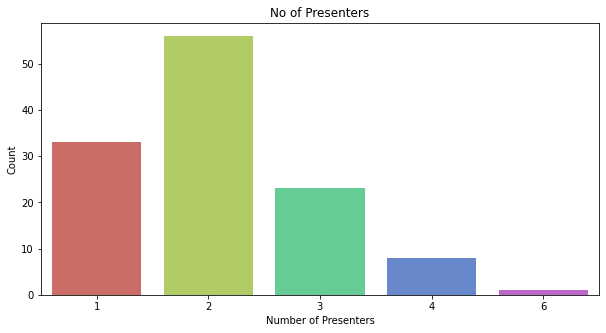

In [23]:
s =  data['Number of Presenters'].value_counts().rename_axis('Number of Presenters').reset_index(name = 'Count')
s['Number of Presenters'].astype(str)
plt.figure(figsize=(10,5))
plt.title('No of Presenters')
sns.barplot(x =s['Number of Presenters'], y = s['Count'], palette= 'hls');

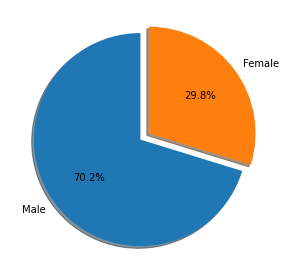

In [24]:
data3=[data['Male Presenters'].sum().astype(int),data['Female Presenters'].sum().astype(int)]
labels=["Male",'Female']
fig1, ax1 = plt.subplots()
explode = (0, 0.1)
ax1.pie(data3,labels=labels,explode=explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.tight_layout()
plt.show()

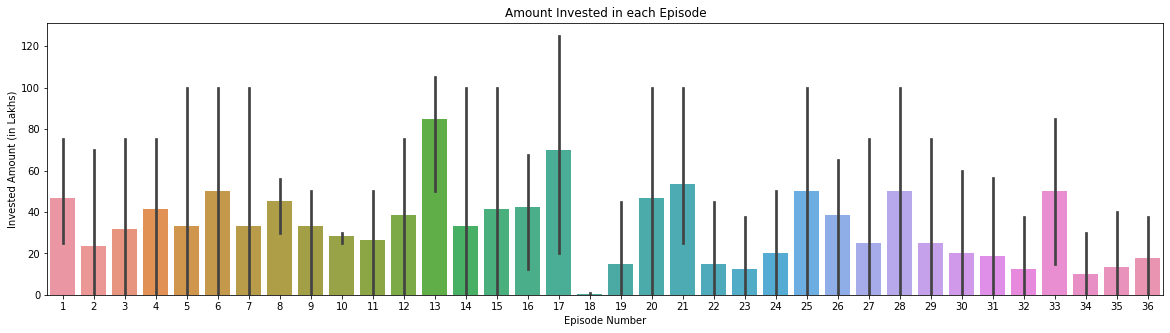

In [25]:
plt.figure(figsize=(20,5))
plt.title('Amount Invested in each Episode')
sns.barplot(data=data,x="Episode Number",y='Total Deal Amount')
plt.ylabel("Invested Amount (in Lakhs)")
plt.show()

In [26]:
#How many Industries in each field?
data["Industry"].value_counts()

Food                   37
Beauty/Fashion         22
Manufacturing          17
Technology             11
Education               8
Services                7
Medical                 7
Electrical Vehicles     4
Animal/Pets             3
Hardware                3
Sports                  2
Name: Industry, dtype: int64

In [27]:
#Which start-up got highest investment?
data.loc[data['Total Deal Amount'].idxmax()]

Season Number                                            1
Episode Number                                          17
Episode Title                           A Wave Of Startups
Startup Name                                 Aas Vidyalaya
Industry                                         Education
Business Description                            EdTech App
Company Website              https://www.aasvidyalaya.com/
Number of Presenters                                     2
Male Presenters                                        1.0
Female Presenters                                      1.0
Couple Presenters                                      1.0
Pitchers Average Age                                Middle
Started in                                          2019.0
Pitchers City                                       Mumbai
Pitchers State                                 Maharashtra
Yearly Revenue                                       150.0
Monthly Sales                                          0

### Top 10 Deal

In [28]:
data4=data.loc[data['Accepted Offer']==1,['Startup Name', 'Total Deal Amount', 'Total Deal Equity', 
                                                     'Total Deal Debt']]
data4=data.sort_values(by=['Total Deal Amount'],ascending=False)[:10]

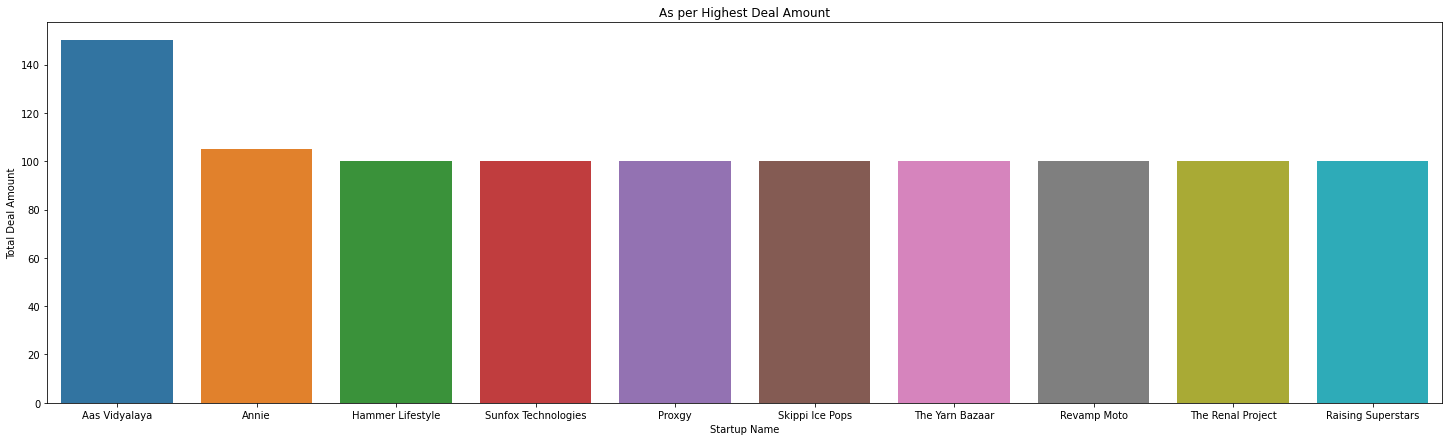

In [29]:
plt.figure(figsize=(25,7))
sns.barplot(x='Startup Name', y='Total Deal Amount', data=data4)
plt.title('As per Highest Deal Amount')
plt.show()

In [30]:
data5=data.loc[data['Accepted Offer']==1,['Startup Name', 'Total Deal Amount', 'Total Deal Equity','Total Deal Debt']]
data5=data.sort_values(by=['Total Deal Debt'],ascending=False)[:10]
data5

,Season Number,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Pitch Number,,,,,,,,,,,,,,,,,,,,,
56,1,18,Investing In Profitable Businesses,Otua,Electrical Vehicles,Electric Auto Vehicle Dandera,https://www.danderaelectric.com/,2,2.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
120,1,36,Gateway To Shark Tank India,Store My Goods,Services,Storage solutions,https://storemygoods.in/,3,2.0,1.0,...,0.0,0.00,0.0,25.0,2.0,25.0,0.0,0.0,0.0,2.0
72,1,23,Investing In Innovation,Namhya Foods,Food,Ayurvedic Enriched Food,0,1,0.0,1.0,...,50.0,10.00,50.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1,3,Aam Aadmi Ke Business Ideas,NOCD,Food,Energy Drink,0,2,2.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46,1,16,Winning The Sharks Trust,Bamboo India,Manufacturing,Bamboo Products,https://www.bambooindia.com/,2,1.0,1.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
62,1,20,A Variety Of Ideas,The State Plate,Food,Delicacies,https://thestateplate.com/,2,1.0,1.0,...,0.0,0.00,0.0,40.0,3.0,25.0,0.0,0.0,0.0,1.0
44,1,15,It's Time To Change,PNT,Technology,Robotics and Automation Solutions,https://pntsolutions.in/,2,2.0,0.0,...,0.0,0.00,0.0,25.0,25.0,25.0,0.0,0.0,0.0,1.0
66,1,21,Game-changing Ideas,Sid07 Designs,Hardware,Inventions,https://sid07designs.com/,1,1.0,0.0,...,0.0,0.00,0.0,25.0,75.0,22.0,0.0,0.0,0.0,1.0
77,1,24,A Decade Of Indian Entrepreneurship,KG Agrotech,Hardware,Agricultural Innovations,0,2,2.0,0.0,...,0.0,0.00,0.0,10.0,40.0,20.0,0.0,0.0,0.0,1.0


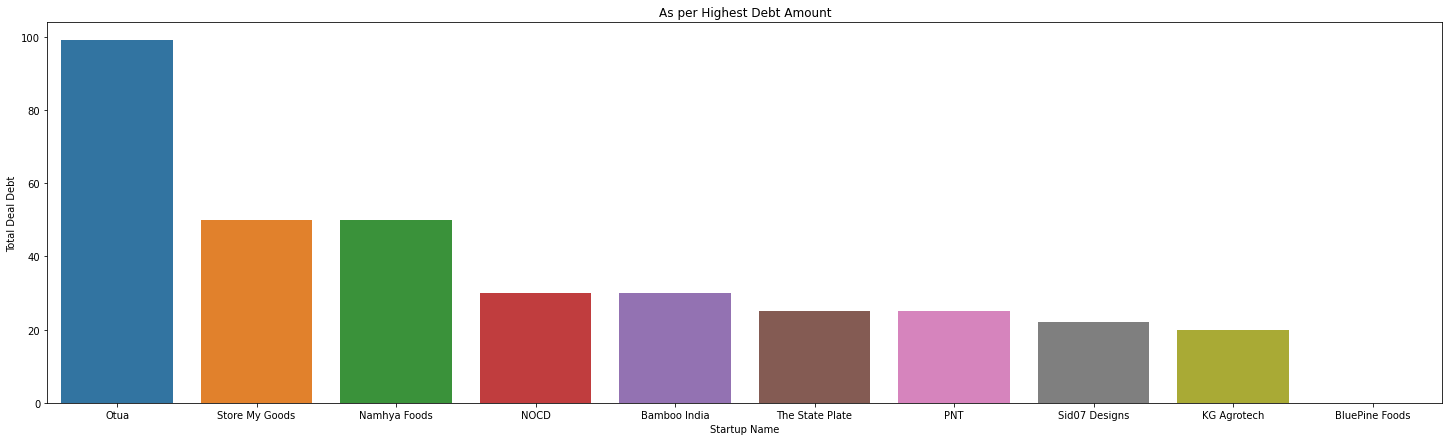

In [31]:
plt.figure(figsize=(25,7))
sns.barplot(x='Startup Name', y='Total Deal Debt', data=data5)
plt.title('As per Highest Debt Amount')
plt.show()

In [32]:
data6=data.loc[data['Accepted Offer']==1,['Startup Name', 'Total Deal Amount', 'Total Deal Equity','Total Deal Debt']]
data6=data.sort_values(by=['Total Deal Equity'],ascending=False)[:10]
data6

,Season Number,Episode Number,Episode Title,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
Pitch Number,,,,,,,,,,,,,,,,,,,,,
66,1,21,Game-changing Ideas,Sid07 Designs,Hardware,Inventions,https://sid07designs.com/,1,1.0,0.0,...,0.0,0.0,0.0,25.00,75.00,22.0,0.00,0.0,0.0,1.0
82,1,26,Revolutionary Ideas,Isak Fragrances,Beauty/Fashion,Perfumes Fragrances,https://isakfragrances.com/,1,0.0,1.0,...,0.0,0.0,0.0,50.00,50.00,0.0,0.00,0.0,0.0,1.0
2,1,1,Badlegi Business Ki Tasveer,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,2.0
77,1,24,A Decade Of Indian Entrepreneurship,KG Agrotech,Hardware,Agricultural Innovations,0,2,2.0,0.0,...,0.0,0.0,0.0,10.00,40.00,20.0,0.00,0.0,0.0,1.0
43,1,15,It's Time To Change,Hammer Lifestyle,Manufacturing,Smart Audio Products,https://hammeronline.in/,3,3.0,0.0,...,100.0,40.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1.0
76,1,24,A Decade Of Indian Entrepreneurship,The Sass Bar,Beauty/Fashion,Gifts Soaps,https://www.thesassbar.com/,1,0.0,1.0,...,0.0,0.0,0.0,0.00,0.00,0.0,25.00,17.5,0.0,2.0
23,1,8,Shark Ko Impress Karne Wale Ideas,Vivalyf Innovations,Medical,Easy Life Prickless Diabetes Testing Machine,https://vivalyf.in/,2,1.0,1.0,...,0.0,0.0,0.0,28.00,16.66,0.0,0.00,0.0,0.0,2.0
3,1,1,Badlegi Business Ki Tasveer,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,0.0,1.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,2.0
91,1,28,Meeting The New India Minds,Gold Safe Solutions,Manufacturing,Anti-Suicidal Fan Rod,https://www.goldlife.co.in/,2,2.0,0.0,...,0.0,0.0,0.0,16.66,10.00,0.0,16.66,10.0,0.0,3.0


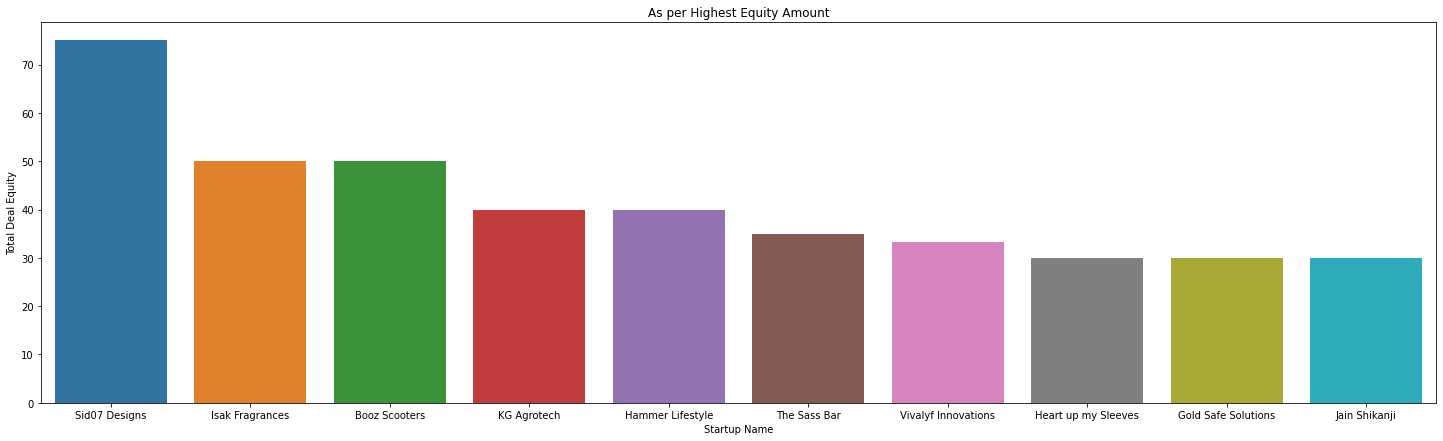

In [33]:
plt.figure(figsize=(25,7))
sns.barplot(x='Startup Name', y='Total Deal Equity', data=data6)
plt.title('As per Highest Equity Amount')
plt.show()

### Sharks Investment Report

#### Ashneer's Investment Detail

In [34]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[data['Ashneer Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[data['Ashneer Debt Amount'].sum()],
    'Equity Received':[data['Ashneer Investment Equity'].sum()]},index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,539.33,114.0,93.24


In [35]:
data.loc[(data['Ashneer Investment Amount']!=0),
         ['Startup Name','Number of sharks in deal','Ashneer Investment Amount',
        'Ashneer Investment Equity','Ashneer Debt Amount']]

,Startup Name,Number of sharks in deal,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount
Pitch Number,,,,,
1,BluePine Foods,3.0,25.00,5.33,0.0
2,Booz Scooters,2.0,20.00,25.00,0.0
4,Tagz Foods,1.0,70.00,2.75,0.0
16,Skippi Ice Pops,5.0,20.00,3.00,0.0
19,Raising Superstars,2.0,50.00,2.00,0.0
22,Beyond Snack,2.0,25.00,1.25,0.0
24,Motion Breeze,1.0,30.00,6.00,0.0
30,EventBeep,3.0,10.00,1.00,0.0
39,The Yarn Bazaar,4.0,25.00,2.50,0.0


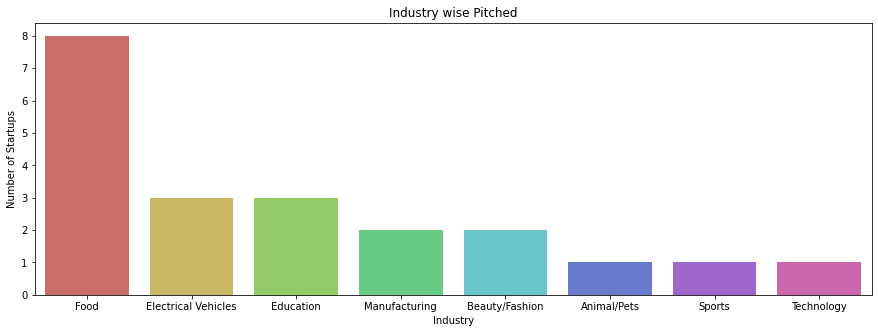

In [36]:
plt.figure(figsize=(15,5))
plt.title('Industry wise Pitched')
sns.countplot(data[data['Ashneer Investment Amount']!=0]['Industry'], palette='hls')
plt.ylabel('Number of Startups')
plt.show()

#### Aman's Investment Details

In [37]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[data['Aman Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[data['Aman Debt Amount'].sum()],
    'Equity Received':[data['Aman Investment Equity'].sum()]},index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,894.490016,50.0,164.246


In [38]:
data.loc[(data['Aman Investment Amount']!=0),['Startup Name','Number of sharks in deal','Aman Investment Amount',
                                                             'Aman Investment Equity','Aman Debt Amount']]

,Startup Name,Number of sharks in deal,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount
Pitch Number,,,,,
1,BluePine Foods,3.0,25.000000,5.330,0.0
8,Peeschute,1.0,75.000000,6.000,0.0
12,Bummer,2.0,37.500000,3.750,0.0
13,Revamp Moto,2.0,50.000000,0.750,0.0
16,Skippi Ice Pops,5.0,20.000000,3.000,0.0
19,Raising Superstars,2.0,50.000000,2.000,0.0
22,Beyond Snack,2.0,25.000000,1.250,0.0
25,Altor,2.0,25.000000,3.500,0.0
26,Ariro,2.0,25.000000,5.000,0.0


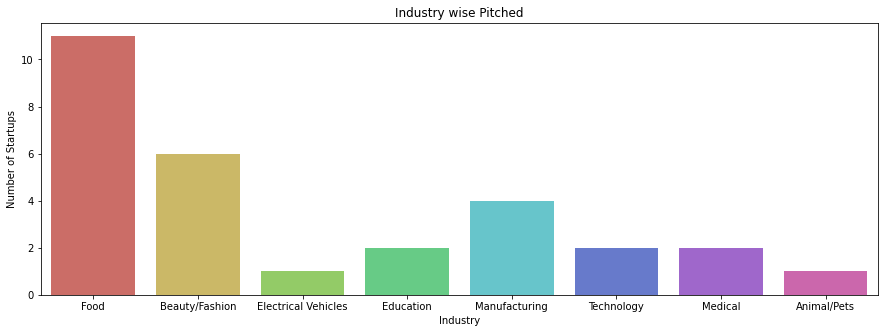

In [39]:
plt.figure(figsize=(15,5))
plt.title('Industry wise Pitched')
sns.countplot(data[data['Aman Investment Amount']!=0]['Industry'], palette='hls')
plt.ylabel('Number of Startups')
plt.show()

#### Peyush's Investment Details

In [40]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[data['Peyush Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[data['Peyush Debt Amount'].sum()],
    'Equity Received':[data['Peyush Investment Equity'].sum()]},index=['Count'])


,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,789.650252,117.0,317.84


In [41]:
data.loc[(data['Peyush Investment Amount']!=0),['Startup Name','Number of sharks in deal','Peyush Investment Amount',
                                                             'Peyush Investment Equity','Peyush Debt Amount']]

,Startup Name,Number of sharks in deal,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount
Pitch Number,,,,,
23,Vivalyf Innovations,2.0,28.000000,16.66,0.0
26,Ariro,2.0,25.000000,5.00,0.0
28,Nuutjob,3.0,8.330000,6.66,0.0
29,Meatyour,3.0,10.000000,6.66,0.0
30,EventBeep,3.0,10.000000,1.00,0.0
36,LOKA,3.0,13.330000,8.00,0.0
37,Annie,3.0,35.000000,1.00,0.0
38,Carragreen,2.0,25.000000,10.00,0.0
39,The Yarn Bazaar,4.0,25.000000,2.50,0.0


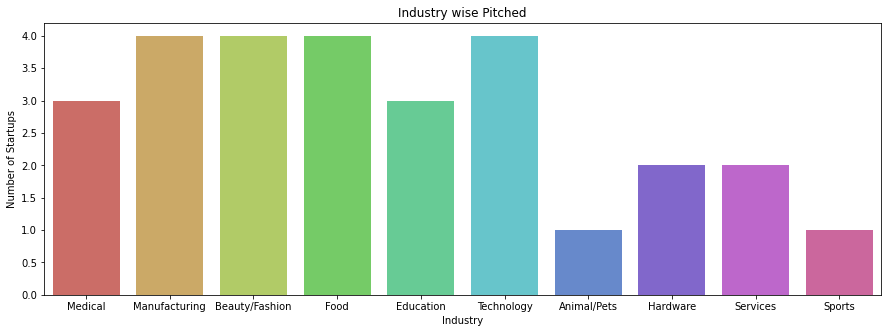

In [42]:
plt.figure(figsize=(15,5))
plt.title('Industry wise Pitched')
sns.countplot(data[data['Peyush Investment Amount']!=0]['Industry'], palette='hls')
plt.ylabel('Number of Startups')
plt.show()

#### Anupam's Investment Details

In [43]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[data['Anupam Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[data['Anupam Debt Amount'].sum()],
    'Equity Received':[data['Anupam Investment Equity'].sum()]},index=['Count'])


,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,533.830268,15.0,166.346


In [44]:
data.loc[(data['Anupam Investment Amount']!=0),['Startup Name','Number of sharks in deal','Anupam Investment Amount',
                                                             'Anupam Investment Equity','Anupam Debt Amount']]

,Startup Name,Number of sharks in deal,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount
Pitch Number,,,,,
3,Heart up my Sleeves,2.0,12.500000,15.000,0.0
10,Cos IQ,2.0,25.000000,12.500,0.0
13,Revamp Moto,2.0,50.000000,0.750,0.0
16,Skippi Ice Pops,5.0,20.000000,3.000,0.0
23,Vivalyf Innovations,2.0,28.000000,16.660,0.0
29,Meatyour,3.0,10.000000,6.660,0.0
32,ARRCOAT Surface Textures,1.0,50.000000,15.000,0.0
36,LOKA,3.0,13.330000,8.000,0.0
37,Annie,3.0,35.000000,1.000,0.0


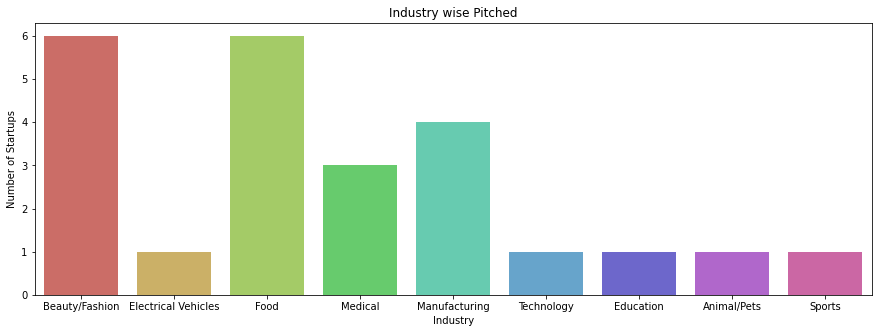

In [45]:
plt.figure(figsize=(15,5))
plt.title('Industry wise Pitched')
sns.countplot(data[data['Anupam Investment Amount']!=0]['Industry'], palette='hls')
plt.ylabel('Number of Startups')
plt.show()

#### Ghazal's Investment Details

In [46]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[data['Ghazal Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[data['Ghazal Debt Amount'].sum()],
    'Equity Received':[data['Ghazal Investment Equity'].sum()]},index=['Count'])


,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,129.990252,0.0,46.7


In [47]:
data.loc[(data['Ghazal Investment Amount']!=0),['Startup Name','Number of sharks in deal','Ghazal Investment Amount',
                                                             'Ghazal Investment Equity','Ghazal Debt Amount']]

,Startup Name,Number of sharks in deal,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount
Pitch Number,,,,,
76,The Sass Bar,2.0,25.000000,17.5,0.0
80,Sunfox Technologies,5.0,20.000000,1.2,0.0
86,Watt Technovations,4.0,0.000253,1.0,0.0
89,Humpy A2,3.0,33.330000,5.0,0.0
91,Gold Safe Solutions,3.0,16.660000,10.0,0.0
92,Wakao Foods,3.0,25.000000,7.0,0.0
111,Nomad Food Project,4.0,10.000000,5.0,0.0


In [48]:
data.loc[(data['Ghazal Investment Amount']!=0),['Startup Name','Number of sharks in deal','Ghazal Investment Amount',
                                                             'Ghazal Investment Equity','Ghazal Debt Amount']]

,Startup Name,Number of sharks in deal,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount
Pitch Number,,,,,
76,The Sass Bar,2.0,25.000000,17.5,0.0
80,Sunfox Technologies,5.0,20.000000,1.2,0.0
86,Watt Technovations,4.0,0.000253,1.0,0.0
89,Humpy A2,3.0,33.330000,5.0,0.0
91,Gold Safe Solutions,3.0,16.660000,10.0,0.0
92,Wakao Foods,3.0,25.000000,7.0,0.0
111,Nomad Food Project,4.0,10.000000,5.0,0.0


#### Vineeta's Investment Details

In [49]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[data['Vineeta Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[data['Vineeta Debt Amount'].sum()//1],
    'Equity Received':[data['Vineeta Investment Equity'].sum()]},index=['Count'])


,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,335.32,30.0,135.53


In [50]:
data.loc[(data['Vineeta Investment Amount']!=0),['Startup Name','Number of sharks in deal','Vineeta Investment Amount',
                                                             'Vineeta Investment Equity','Vineeta Debt Amount']]

,Startup Name,Number of sharks in deal,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount
Pitch Number,,,,,
1,BluePine Foods,3.0,25.00,5.33,0.0
2,Booz Scooters,2.0,20.00,25.00,0.0
3,Heart up my Sleeves,2.0,12.50,15.00,0.0
9,NOCD,1.0,20.00,15.00,30.0
10,Cos IQ,2.0,25.00,12.50,0.0
16,Skippi Ice Pops,5.0,20.00,3.00,0.0
65,Get-A-Whey,3.0,33.33,5.00,0.0
67,The Quirky Naari,2.0,17.50,12.00,0.0
80,Sunfox Technologies,5.0,20.00,1.20,0.0


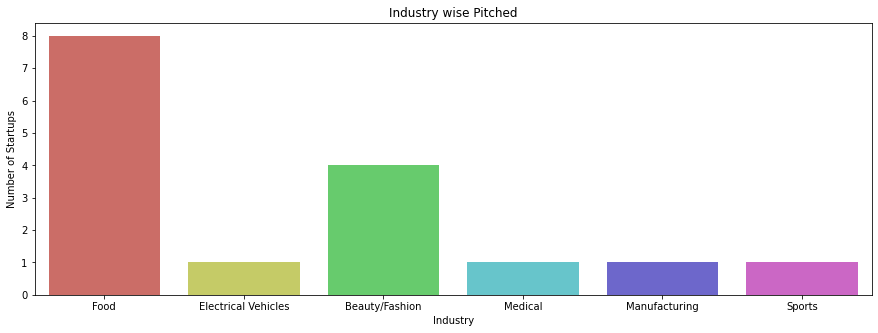

In [51]:
plt.figure(figsize=(15,5))
plt.title('Industry wise Pitched')
sns.countplot(data[data['Vineeta Investment Amount']!=0]['Industry'], palette='hls')
plt.ylabel('Number of Startups')
plt.show()

#### Namita's Investment detail

In [52]:
pd.DataFrame({
    'Invested Amt(Lakhs)':[data['Namita Investment Amount'].sum()],
    'Debt Amt(Lakhs)':[data['Namita Debt Amount'].sum()],
    'Equity Received':[data['Namita Investment Equity'].sum()]
},
index=['Count'])

,Invested Amt(Lakhs),Debt Amt(Lakhs),Equity Received
Count,680.330268,25.0,140.776


In [53]:
data.loc[(data['Namita Investment Amount']!=0),['Startup Name','Number of sharks in deal','Namita Investment Amount','Namita Investment Equity','Namita Debt Amount']]

,Startup Name,Number of sharks in deal,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount
Pitch Number,,,,,
12,Bummer,2.0,37.500000,3.750,0.0
16,Skippi Ice Pops,5.0,20.000000,3.000,0.0
17,Menstrupedia,1.0,50.000000,20.000,0.0
25,Altor,2.0,25.000000,3.500,0.0
28,Nuutjob,3.0,8.330000,6.660,0.0
33,Farda,2.0,15.000000,10.000,0.0
34,Auli,1.0,75.000000,15.000,0.0
37,Annie,3.0,35.000000,1.000,0.0
40,The Renal Project,2.0,50.000000,3.000,0.0


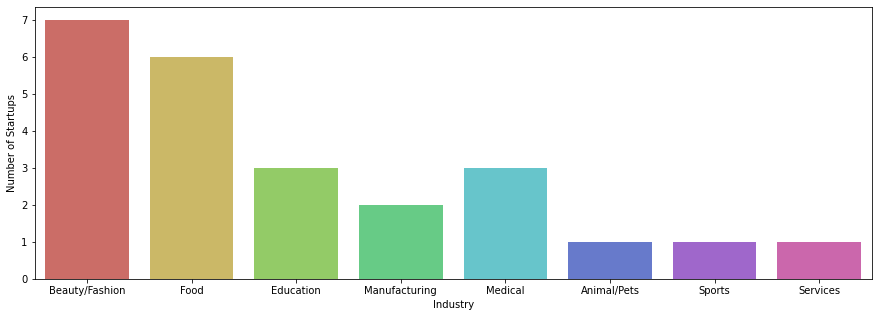

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(data[data['Namita Investment Amount']!=0]['Industry'], palette='hls')
plt.ylabel('Number of Startups')
plt.show()